In [1]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
import random
import numpy as np
from sklearn.decomposition import PCA
import pandas


%matplotlib inline

In [2]:
def ims(x,*keyargs,**other):
    with sns.axes_style("white"):
        plt.imshow(x,*keyargs,**other)
def flatInput(train_data,train_labels,test_data,test_labels):
    trainX = train_data
    trainY = train_labels

    tx = test_data
    ty = test_labels

    # Flatten data for test images as a vector and labels as numbers
    flattenDataset = np.nan_to_num(np.array([image.flatten() for image in trainX]))
    flatTest = np.nan_to_num(np.array([image.flatten() for image in tx]))
    fTrainLabels = np.where(trainY == 1)[1]
    fTestLabels = np.where(ty == 1)[1]
    return flattenDataset, flatTest, fTrainLabels, fTestLabels

def inverseNorm(image,dataset):
    im = image.reshape((96,96))
    return (im * dataset.std) + dataset.mean

In [3]:
def pca2Visua(pca,data,labels,nClases):
    # Show a few statistics of the data
    print  "Pca with 2 components explained variance " + str(pca.explained_variance_ratio_)
    print "PCA 2 comp of the data (using train)"

    transformed = pca.transform(data)

    plt.figure()
    allscatter = []
    for c in range(nClases):
        elements = np.where(labels == c)
        temp = plt.scatter(transformed[elements, 0], transformed[elements, 1],
                           facecolors='none', label='Class ' + str(c), c=np.random.rand(3, 1))
        allscatter.append(temp)
    plt.legend(tuple(allscatter),
               tuple(["class " + str(c) for c in range(nClases)]),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.show()

In [4]:
def getNewDataset(seed=None):
    if seed is None:
        seed = int(100 * random.random())
    #Changing the seed will give a new train-val-test split
    dataset = Dataset("data/BaselineOuterInner", batch_size=20,seed=seed)
    flattenDataset, flatTest, fTrainLabels, fTestLabels = flatInput(dataset.train_data, dataset.train_labels, dataset.test_data, dataset.test_labels)
    return flattenDataset, flatTest, fTrainLabels, fTestLabels, dataset

In [5]:
flattenDataset, flatTest, fTrainLabels, fTestLabels,dataset = getNewDataset(seed=1)
nClases = dataset.getNclasses()

In [7]:
cn = {0: "Inner fault", 1: "Baseline", 2 : "Outer fault "}

Distribution class for train  Counter({2: 2618, 1: 1668, 0: 1010})
Distribution class for test    Counter({2: 1612, 1: 1022, 0: 609})
Pca with 2 components explained variance [ 0.25292258  0.01791078]
PCA 2 comp of the data (using train)


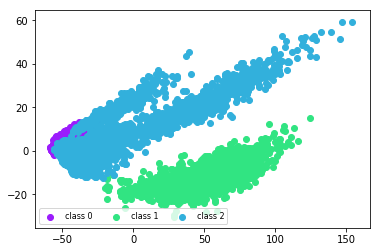

In [8]:
print "Distribution class for train ", Counter(fTrainLabels)
print "Distribution class for test   ",Counter(fTestLabels)
pca = PCA(n_components=2)
pca.fit(flattenDataset)


pca2Visua(pca,flattenDataset,fTrainLabels,nClases)

Train image  966d2_2.jpg
Test image  150d3_2.jpg


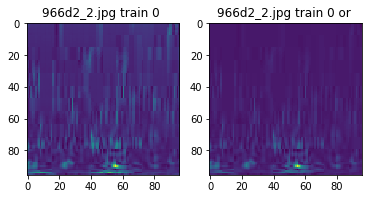

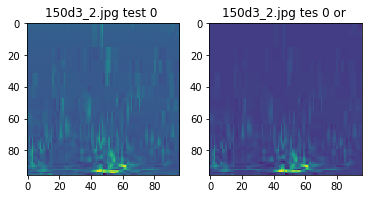

In [9]:
#Show first 1 images train and 1 image test (to show that seed changed)

#------------------TRAIN IAMGE
fname = dataset.getTrainFilename(0)
print "Train image ",fname

imTrain =   flattenDataset[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' train 0 ')
grid[0].imshow(imTrain)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imTrain,dataset)

grid[1].set_title(fname+' train 0 or ')
grid[1].imshow(org)

#------------------TEST IAMGE


fname = dataset.getTestFilename(0)
print "Test image ",fname
imgTest =   flatTest[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' test 0 ')
grid[0].imshow(imgTest)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imgTest,dataset)

grid[1].set_title(fname+' tes 0 or ')
grid[1].imshow(org)

Class  0  name  Inner fault
Class  1  name  Baseline
Class  2  name  Outer fault 


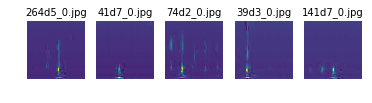

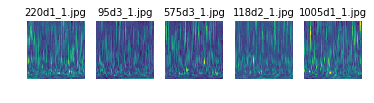

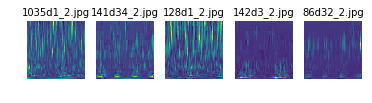

In [10]:
#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)

#if you want to see iamges as the files use 
# inverseNorm(img,dataset)

for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    
    name = cn[c]

    random.seed(5)
    
    #Show 5 random element of that class
    fig, grid = plt.subplots(1, 5)
    print "Class ",c," name ",name
    for j in range(5):
        
        r=random.randint(0,elements[0].shape[0])
        ind = elements[0][r]
        fileName = dataset.getTrainFilename(ind)
        image = flattenDataset[ind,:].reshape((96,96))
        
        #If you want to see images as shown in files
        # image = inverseNorm(flattenDataset[ind,:],dataset)
        
        grid[j].imshow(image)
        grid[j].set_adjustable('box-forced')
        grid[j].autoscale(False)
        grid[j].set_title(str(fileName), fontsize=10)
        grid[j].axis('off')

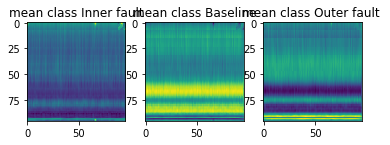

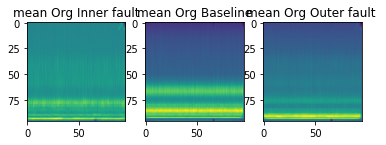

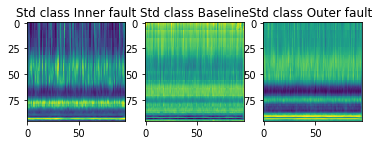

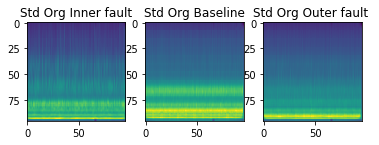

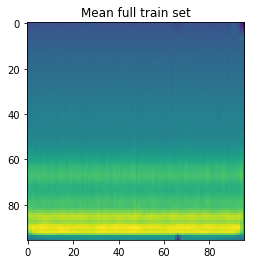

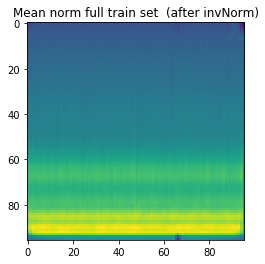

In [11]:
#Show mean image of train per class
#NOTE THIS IMAGE IS NOT THE MEAN IMAGE IN DATASET. This mean image is calculated with normalized images
#THe original mean image was calculated with the original images in train set.

fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = np.mean(flattenDataset[elements,:],axis=1).reshape((96,96))
    grid[c].set_title('mean class '+str(cn[c]))
    grid[c].imshow(classMean)

#SHOW IMAGES MEAN AS ORIGINAL IMAGE (INVERT NORM)
fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = inverseNorm(np.mean(flattenDataset[elements,:],axis=1),dataset)
    grid[c].set_title('mean Org '+str(cn[c]))
    grid[c].imshow(classMean)

fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = np.std(flattenDataset[elements,:],axis=1).reshape((96,96))
    grid[c].set_title('Std class '+str(cn[c]))
    grid[c].imshow(classMean)

#SHOW IMAGES MEAN AS ORIGINAL IMAGE (INVERT NORM)
fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = inverseNorm(np.std(flattenDataset[elements,:],axis=1),dataset)
    grid[c].set_title('Std Org '+str(cn[c]))
    grid[c].imshow(classMean)

normMean = np.mean(flattenDataset,axis=0)
plt.figure()
plt.title('Mean full train set')
plt.imshow(dataset.mean)

plt.figure()
plt.title('Mean norm full train set  (after invNorm)')
plt.imshow(inverseNorm(normMean,dataset))

In [12]:
import seaborn as sns
#Choose RAW or PCA30
def processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels):
    nComp = 6
    pca = PCA(n_components=nComp)
    pca.fit(flattenDataset)
    print  "Pca with "+str(nComp)+" components explained variance " + str(np.sum(pca.explained_variance_ratio_))
    
    dataPcaTrainX = pca.transform(flattenDataset)
    dataPcaTrainy = fTrainLabels
    
    dataPcaTestX = pca.transform(flatTest)
    dataPcaTesty = fTestLabels
    return dataPcaTrainX,dataPcaTestX,dataPcaTrainy,dataPcaTesty

Pca with 6 components explained variance 0.303127009918


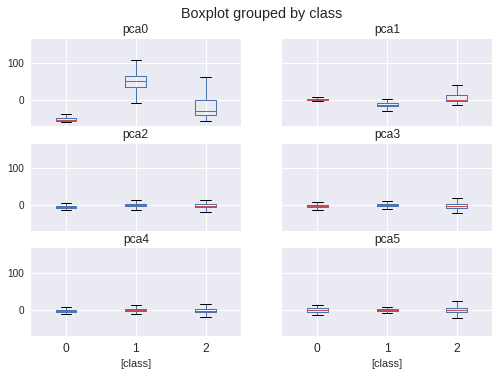

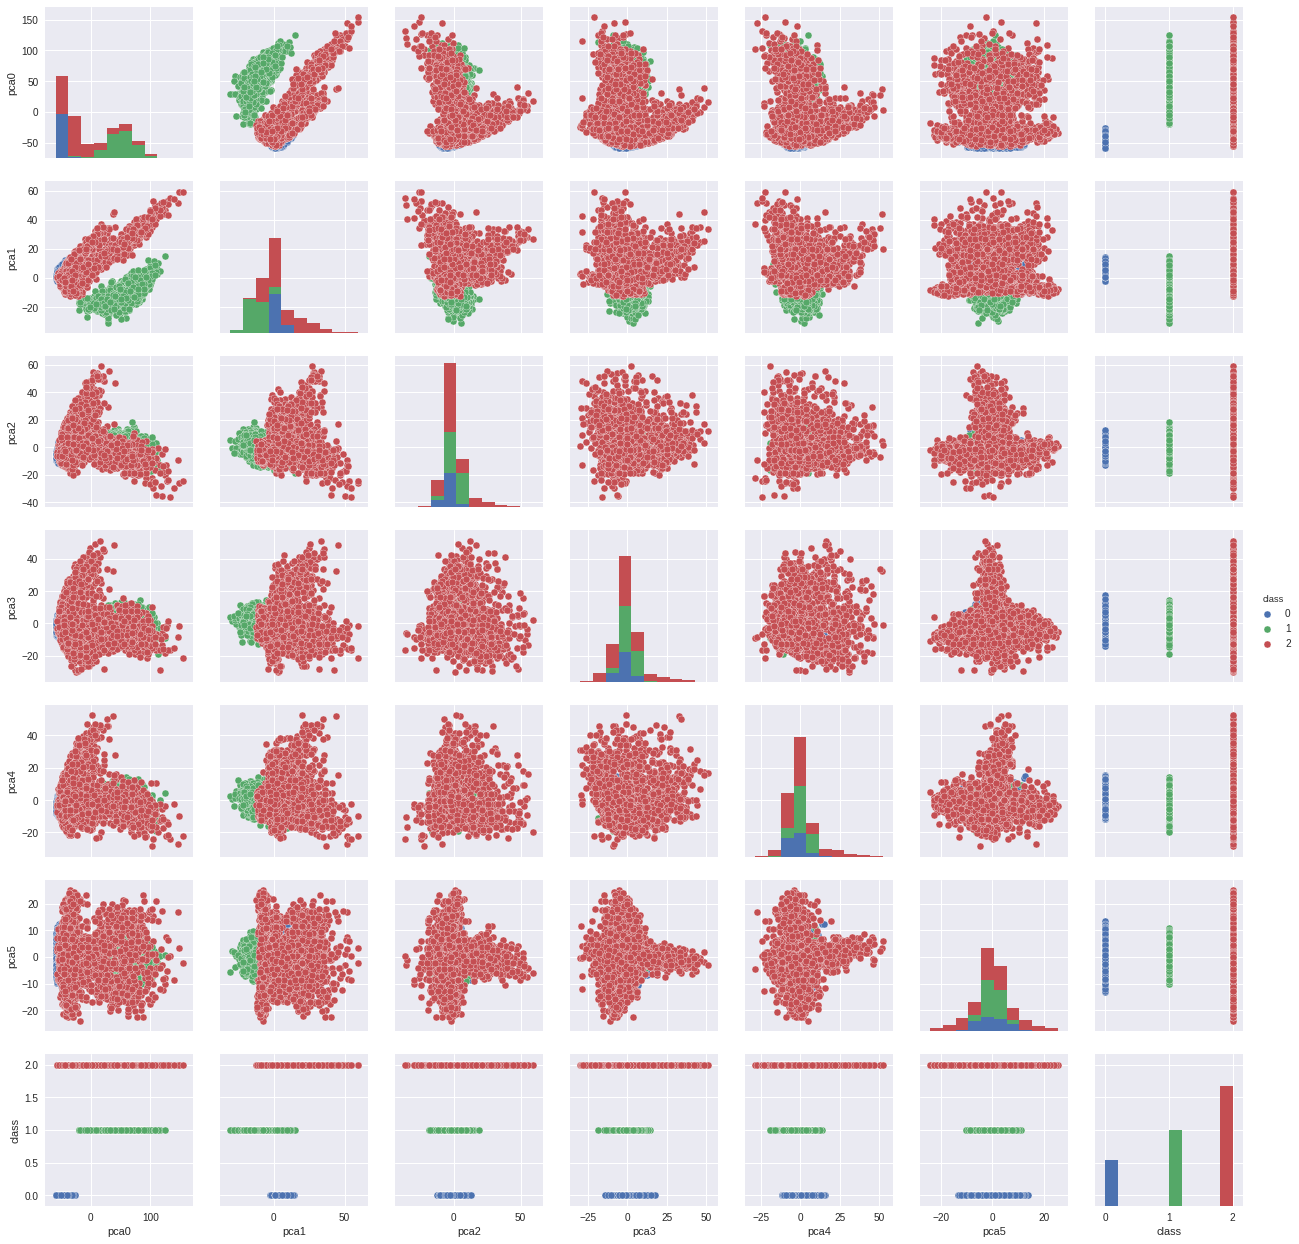

In [13]:
dx,dtestx,ltrain,ltest = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels)

data = pandas.DataFrame(data=dx, columns=['pca'+str(i) for i in range(dx.shape[1])])
data['class'] = pandas.Series(ltrain, index=data.index)
data.boxplot(by='class')
sns.pairplot(data, hue="class")

In [14]:
from sklearn.cluster import MiniBatchKMeans


def processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels):
    # Compute clustering with MiniBatchKMeans.
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, batch_size=100,
                          n_init=10, max_no_improvement=10, verbose=0,
                          random_state=0)
    mbk.fit(flattenDataset)
    
    dataKmTrainX = mbk.transform(flattenDataset)
    dataKmTrainy = fTrainLabels
    
    dataKmTestX = mbk.transform(flatTest)
    dataKmTesty = fTestLabels
    
    return dataKmTrainX,dataKmTestX,dataKmTrainy,dataKmTesty

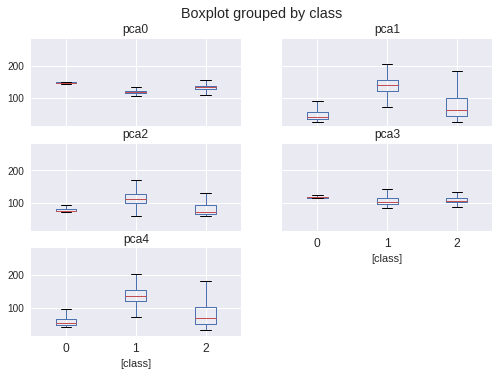

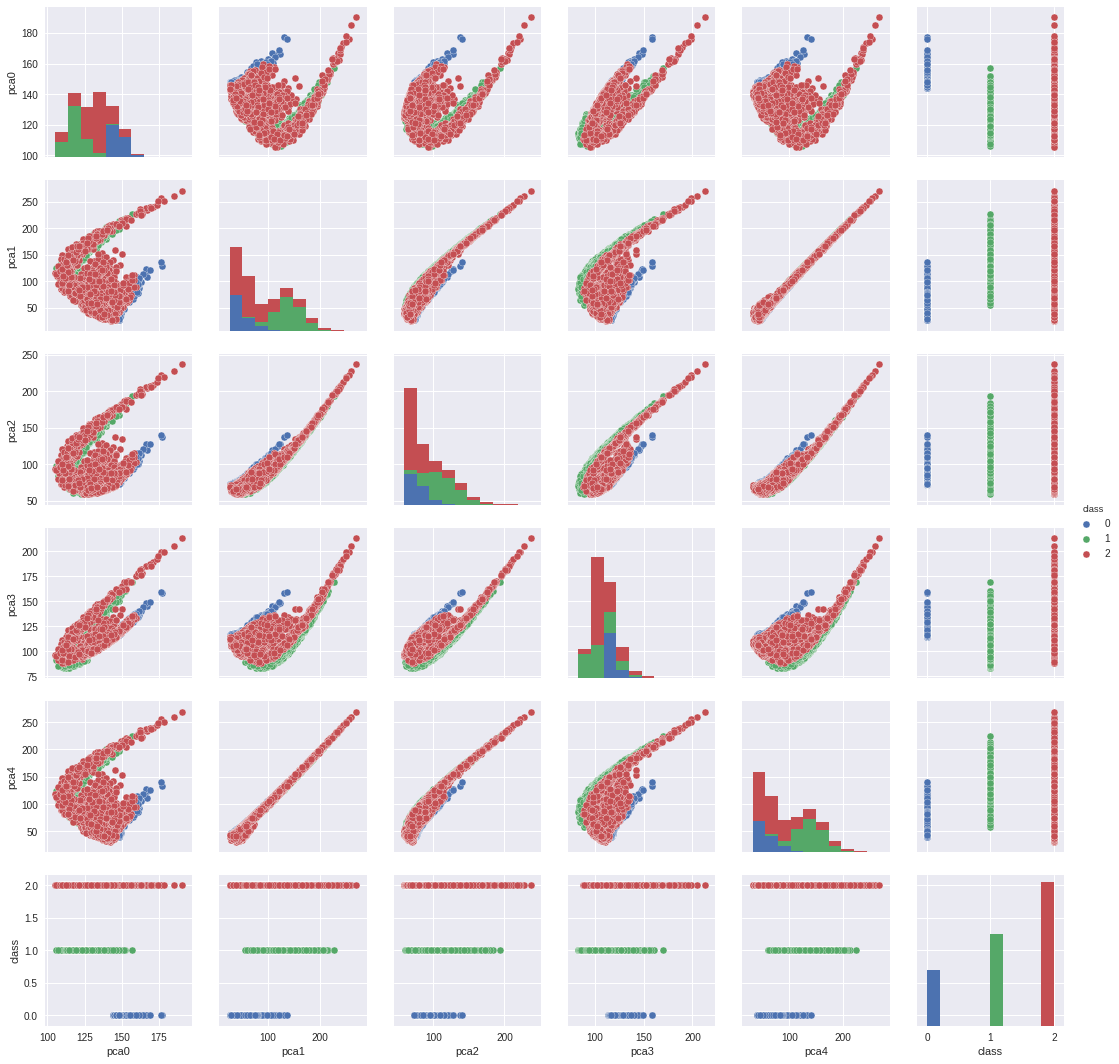

In [15]:
dx,dtestx,ltrain,ltest = processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels)

data = pandas.DataFrame(data=dx, columns=['pca'+str(i) for i in range(dx.shape[1])])
data['class'] = pandas.Series(ltrain, index=data.index)
data.boxplot(by='class')
sns.pairplot(data, hue="class")

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [17]:
#Use MLP
def runMLP(X,y, tX,ty,returnVal=False):
    clf = MLPClassifier( alpha=1e-5,hidden_layer_sizes=(50, 3), random_state=1)
    
    clf.fit(X, y) 
    pred = clf.predict(tX)
    
    if not returnVal:
        print classification_report(ty, pred)
    else:
        return accuracy_score(ty, pred)
    
#Use Linear support machine
def useLinear(X,y, tX,ty,returnVal=False):
    clf = SGDClassifier()
    clf.fit(X, y) 
    pred = clf.predict(tX)
    
    if not returnVal:
        print classification_report(ty, pred)
    else:
        return accuracy_score(ty, pred)
    
#USE SVM (uses rbf o gaussian kernel)
def useSVM(X,y, tX,ty,returnVal=False):
    clf = SVC()
    clf.fit(X, y) 
    pred = clf.predict(tX)
    
    if not returnVal:
        print classification_report(ty, pred)
    else:
        return accuracy_score(ty, pred)

In [18]:
#Use flat dataset

X,y, tX,ty = flattenDataset, fTrainLabels, flatTest, fTestLabels

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X[:500,:],y[:500], tX,ty)

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       609
          1       1.00      1.00      1.00      1022
          2       0.99      0.99      0.99      1612

avg / total       0.99      0.99      0.99      3243

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       609
          1       1.00      1.00      1.00      1022
          2       0.98      0.99      0.98      1612

avg / total       0.98      0.98      0.98      3243

             precision    recall  f1-score   support

          0       0.86      0.93      0.89       609
          1       0.97      0.99      0.98      1022
          2       0.97      0.92      0.94      1612

avg / total       0.95      0.95      0.95      3243



In [19]:
# #use pca dataset
X,tX,y,ty = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels)

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X,y, tX,ty)

Pca with 6 components explained variance 0.303127755962
             precision    recall  f1-score   support

          0       0.89      0.94      0.91       609
          1       1.00      1.00      1.00      1022
          2       0.98      0.95      0.96      1612

avg / total       0.97      0.97      0.97      3243

             precision    recall  f1-score   support

          0       0.99      0.45      0.62       609
          1       0.98      1.00      0.99      1022
          2       0.82      0.98      0.90      1612

avg / total       0.90      0.89      0.87      3243

             precision    recall  f1-score   support

          0       0.98      0.55      0.70       609
          1       1.00      0.26      0.41      1022
          2       0.61      1.00      0.76      1612

avg / total       0.80      0.68      0.64      3243



In [20]:
# #use k means dataset
X,tX,y,ty = processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels)

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X,y, tX,ty)

             precision    recall  f1-score   support

          0       0.82      0.97      0.89       609
          1       0.99      0.96      0.97      1022
          2       0.96      0.91      0.94      1612

avg / total       0.94      0.94      0.94      3243

             precision    recall  f1-score   support

          0       0.73      0.60      0.66       609
          1       0.85      0.99      0.92      1022
          2       0.84      0.80      0.82      1612

avg / total       0.82      0.83      0.82      3243

             precision    recall  f1-score   support

          0       0.93      0.89      0.91       609
          1       1.00      0.96      0.98      1022
          2       0.94      0.98      0.96      1612

avg / total       0.96      0.95      0.95      3243



In [24]:
#Now repeat the experiments x times to get mean accuracy from the algorithms
xTimes = 5
resultMLP = []
resultLinear = []
resultSVM = []

#FOR the 3 alg repeat 10 times 
for i in range(xTimes):
    flattenDataset, flatTest, fTrainLabels, fTestLabels,_ = getNewDataset()
    X,y, tX,ty = flattenDataset[:2000,:], fTrainLabels[:2000], flatTest, fTestLabels
    
    resultMLP.append(runMLP(X,y, tX,ty,True)) 
    resultLinear.append(useLinear(X,y, tX,ty,True))
    resultSVM.append(useSVM(X,y, tX,ty,True))

print "Results FLAT DATA "
print "MLP accuracy mean ",np.mean(np.array(resultMLP))," std ",np.std(np.array(resultMLP))
print "Linear SVM accuracy mean ",np.mean(np.array(resultLinear))," std ",np.std(np.array(resultLinear))
print "SVM accuracy mean ",np.mean(np.array(resultSVM))," std ",np.std(np.array(resultSVM))

/home/user/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Results FLAT DATA 
MLP accuracy mean  0.970706136294  std  0.0027990886754
Linear SVM accuracy mean  0.961517113784  std  0.00705698534067
SVM accuracy mean  0.975701510947  std  0.0016479049295


In [22]:
#Now repeat the experiments x times to get mean accuracy from the algorithms
xTimes = 7
resultMLP = []
resultLinear = []
resultSVM = []

#FOR the 3 alg repeat 10 times 
for i in range(xTimes):
    flattenDataset, flatTest, fTrainLabels, fTestLabels,_ = getNewDataset()
    X,tX,y,ty = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels)
    
    resultMLP.append(runMLP(X,y, tX,ty,True)) 
    resultLinear.append(useLinear(X,y, tX,ty,True))
    resultSVM.append(useSVM(X,y, tX,ty,True))

print "Results PCA DATA "
print "MLP accuracy mean ",np.mean(np.array(resultMLP))," std ",np.std(np.array(resultMLP))
print "Linear SVM accuracy mean ",np.mean(np.array(resultLinear))," std ",np.std(np.array(resultLinear))
print "SVM accuracy mean ",np.mean(np.array(resultSVM))," std ",np.std(np.array(resultSVM))

Pca with 6 components explained variance 0.300532430178
Pca with 6 components explained variance 0.302385273744
Pca with 6 components explained variance 0.300472153005
Pca with 6 components explained variance 0.302986517878
Pca with 6 components explained variance 0.302052047479
Pca with 6 components explained variance 0.301832244322
Pca with 6 components explained variance 0.302956115051
Results PCA DATA 
MLP accuracy mean  0.965772432932  std  0.0025427725104
Linear SVM accuracy mean  0.889740540064  std  0.0491474865208
SVM accuracy mean  0.68900048456  std  0.00731165705154


In [23]:
#Now repeat the experiments x times to get mean accuracy from the algorithms
xTimes = 3
resultMLP = []
resultLinear = []
resultSVM = []

#FOR the 3 alg repeat 10 times 
for i in range(xTimes):
    print "Estoy en ",i
    flattenDataset, flatTest, fTrainLabels, fTestLabels,_ = getNewDataset()
    
    X,tX,y,ty = processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels)
    
    resultMLP.append(runMLP(X,y, tX,ty,True)) 
    resultLinear.append(useLinear(X,y, tX,ty,True))
    resultSVM.append(useSVM(X,y, tX,ty,True))

print "Results CLUSTER DATA "
print "MLP accuracy mean ",np.mean(np.array(resultMLP))," std ",np.std(np.array(resultMLP))
print "Linear SVM accuracy mean ",np.mean(np.array(resultLinear))," std ",np.std(np.array(resultLinear))
print "SVM accuracy mean ",np.mean(np.array(resultSVM))," std ",np.std(np.array(resultSVM))

Estoy en  0
Estoy en  1
Estoy en  2
Results CLUSTER DATA 
MLP accuracy mean  0.626785897831  std  0.191241064531
Linear SVM accuracy mean  0.735121800802  std  0.163486706216
SVM accuracy mean  0.942645698427  std  0.00871072888796
